In [17]:
from IPython.display import Image


### This exercise is based on the following articles:

https://towardsdatascience.com/roc-curve-and-auc-from-scratch-in-numpy-visualized-2612bb9459ab

https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

### What is ROC curve?
The Receiving operating characteristic (ROC) graph attempts to interpret how good (or bad) a binary classifier is doing. There are several reasons why a simple confusion matrix isn’t enough to test your models. Still, the ROC representation solves incredibly well the following: the possibility to set more than one threshold in one visualization.



### Confusion Matrix: 
When predicting a binary classification problem, it’s usual to label the positive case as 1 and the negative as 0. When the prediction is equal to the actual value, it is a true case; otherwise, it is a negative one. This matrix aims to reveal information about the proportion of the combinations of these scenarios, including true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN). In the visualization below, you can see an example.

![Image](https://miro.medium.com/v2/resize:fit:640/1*UtE0oo_X93jXYXyc0N_rIQ.gif)


#### True positive rate:
This metric is calculated using the true positives and the false negatives according to the following formula.
![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*ERU-a6EtL8wTKHvW_-WXbw.png)

#### False positive rate: 
This metric is calculated using the false positives and the true negatives according to the following formula.
![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Hpi_vdK0tvobmCMjZcXZrA.png)

#### Predict_proba:
For most models, you can retrieve the probability of the prediction. Probabilities show if there is a difference in the confidence level of the model on the selected class. A higher predict_proba will represent higher confidence levels about the output.

#### Threshold: 
This value defines when models switch their opinion about the output, from positive to negative or vice-versa. By default, models will have a threshold of 0.5. If the value is higher than 0.5, the model will predict the sample as positive, but if it’s lower, it will predict it as negative.


### ROC Curve
The ROC graph has the true positive rate on the y axis and the false positive rate on the x axis. As you might be guessing, this implies that we need a way to create these metrics more than once to give the chart its natural shape. We need an algorithm to iteratively calculate these values.

AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1. By analogy, the Higher the AUC, the better the model is at distinguishing between patients with the disease and no disease.

The ROC curve is plotted with TPR against the FPR where TPR is on the y-axis and FPR is on the x-axis.

![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*pk05QGzoWhCgRiiFbz-oKQ.png)

An excellent model has AUC near to the 1 which means it has a good measure of separability. A poor model has an AUC near 0 which means it has the worst measure of separability. In fact, it means it is reciprocating the result. It is predicting 0s as 1s and 1s as 0s. And when AUC is 0.5, it means the model has no class separation capacity whatsoever.

Let’s interpret the above statements.

As we know, ROC is a curve of probability. So let's plot the distributions of those probabilities:

Note: Red distribution curve is of the positive class (patients with disease) and the green distribution curve is of the negative class(patients with no disease).

![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*Uu-t4pOotRQFoyrfqEvIEg.png)
![Image](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*HmVIhSKznoW8tFsCLeQjRw.png)

This is an ideal situation. When two curves don’t overlap at all means model has an ideal measure of separability. It is perfectly able to distinguish between positive class and negative class.

![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*yF8hvKR9eNfqqej2JnVKzg.png)
![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*-tPXUvvNIZDbqXP0qqYNuQ.png)

When two distributions overlap, we introduce type 1 and type 2 errors. Depending upon the threshold, we can minimize or maximize them. When AUC is 0.7, it means there is a 70% chance that the model will be able to distinguish between positive class and negative class.

![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*iLW_BrJZRI0UZSflfMrmZQ.png)
![Image](https://miro.medium.com/v2/resize:fit:640/format:webp/1*k_MPO2Q9bLNH9k4Wlk6v_g.png)      

This is the worst situation. When AUC is approximately 0.5, the model has no discrimination capacity to distinguish between positive class and negative class.

### The relation between Sensitivity, Specificity, FPR, and Threshold.

Sensitivity and Specificity are inversely proportional to each other. So when we increase Sensitivity, Specificity decreases, and vice versa.

When we decrease the threshold, we get more positive values thus it increases the sensitivity and decreasing the specificity.

Similarly, when we increase the threshold, we get more negative values thus we get higher specificity and lower sensitivity.

As we know FPR is 1 - specificity. So when we increase TPR, FPR also increases and vice versa.

### ROC Curve From Scratch

#### Step 1, choosing a threshold
As we discussed earlier, the ROC curve’s whole idea is to check out different thresholds, so we can set the thresholds into equally distant partitions, and iterate over every threshold

#### Step 2, threshold comparison
In every iteration, we must compare the predicted probability against the current threshold. If the threshold is higher than the predicted probability, we label the sample as a 0, and with 1 on the contrary.

#### Step 3, calculating TPR and FPR
The last part is to calculate the TPR and FPR at every iteration.

![Image](https://miro.medium.com/v2/resize:fit:640/1*mu7-fpZc9FSfV_qDN4mBkw.gif)


### Let's build it!

First let's create a dataset and train a classifier (let's use a Random Forest in this case)

In [18]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt 
import seaborn as sns

X, y = make_classification(n_samples=1000, n_informative=10, n_features=20, flip_y=0.2)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

model = RandomForestClassifier()
model.fit(X_train, y_train)

prob_vector = model.predict_proba(X_test)[:, 1]

#### Define a function that is calculating TPR & FPR as described in step 3

In [19]:
def true_false_positive(threshold_vector, y_test):
#YOUR CODE
    tprs = []
    fprs = []

    for val in threshold_vector:
        y_pred = np.where(y_test >= val, 1, 0)

        tp = np.sum((y_test == 1) & (y_pred == 1))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        tn = np.sum((y_test == 0) & (y_pred == 0))
        fn = np.sum((y_test == 1) & (y_pred == 0))

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        tprs.append(tpr)
        fprs.append(fpr)

    return tprs, fprs


#### Define a function that is calculating ROC now

In [20]:
def roc_from_scratch(probabilities, y_test, partitions=100):
#YOUR CODE
    tprs = []
    fprs = []

    for i in range(partitions):
        threshold = i / partitions
        y_pred = np.where(probabilities >= threshold, 1, 0)

        tp = np.sum((y_test == 1) & (y_pred == 1))
        fp = np.sum((y_test == 0) & (y_pred == 1))
        tn = np.sum((y_test == 0) & (y_pred == 0))
        fn = np.sum((y_test == 1) & (y_pred == 0))

        tpr = tp / (tp + fn)
        fpr = fp / (fp + tn)

        tprs.append(tpr)
        fprs.append(fpr)

    auc = np.trapz(tprs, fprs)
    return auc

#### Plot the ROC for 10 threshold partitions

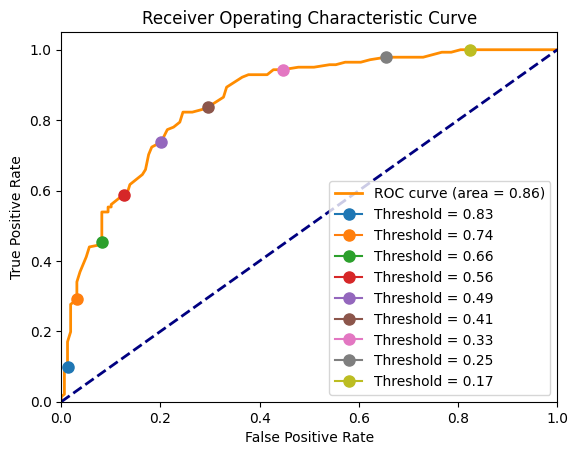

In [21]:
#YOUR CODE
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
roc_auc = auc(fpr, tpr)

# Create 10 equally spaced threshold partitions
partitions = 10
threshold_idxs = [int(len(thresholds)/partitions * i) for i in range(partitions+1)]
thresholds_partitions = thresholds[threshold_idxs[1:-1]]

# Plot ROC curve for each threshold partition
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for threshold in thresholds_partitions:
    idx = np.where(thresholds == threshold)
    plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f"Threshold = {threshold:.2f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

#### Now for 100 partitions

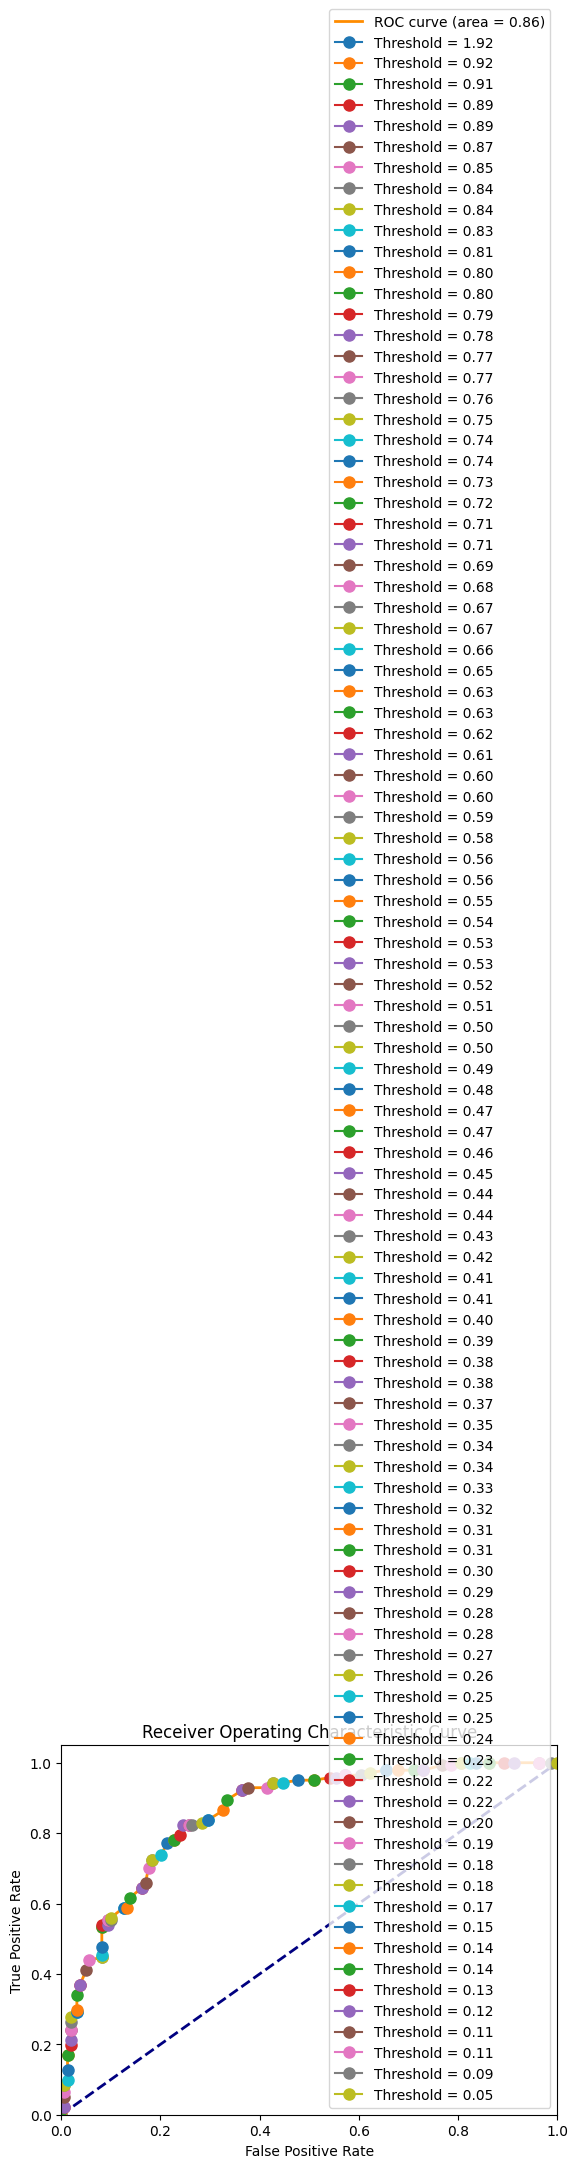

In [22]:
#YOUR CODE
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
roc_auc = auc(fpr, tpr)

# Create 100 equally spaced threshold partitions
partitions = 100
threshold_idxs = [int(len(thresholds)/partitions * i) for i in range(partitions+1)]
thresholds_partitions = thresholds[threshold_idxs[1:-1]]

# Plot ROC curve for each threshold partition
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
for threshold in thresholds_partitions:
    idx = np.where(thresholds == threshold)
    plt.plot(fpr[idx], tpr[idx], marker='o', markersize=8, label=f"Threshold = {threshold:.2f}")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc="lower right")
plt.show()

#### Compare with the scikit-learn implementation

/tmp/ipykernel_240195/1236045408.py:15: RuntimeWarning: invalid value encountered in long_scalars
  tpr = tp / (tp + fn)
/tmp/ipykernel_240195/1236045408.py:16: RuntimeWarning: invalid value encountered in long_scalars
  fpr = fp / (fp + tn)


IndexError: invalid index to scalar variable.

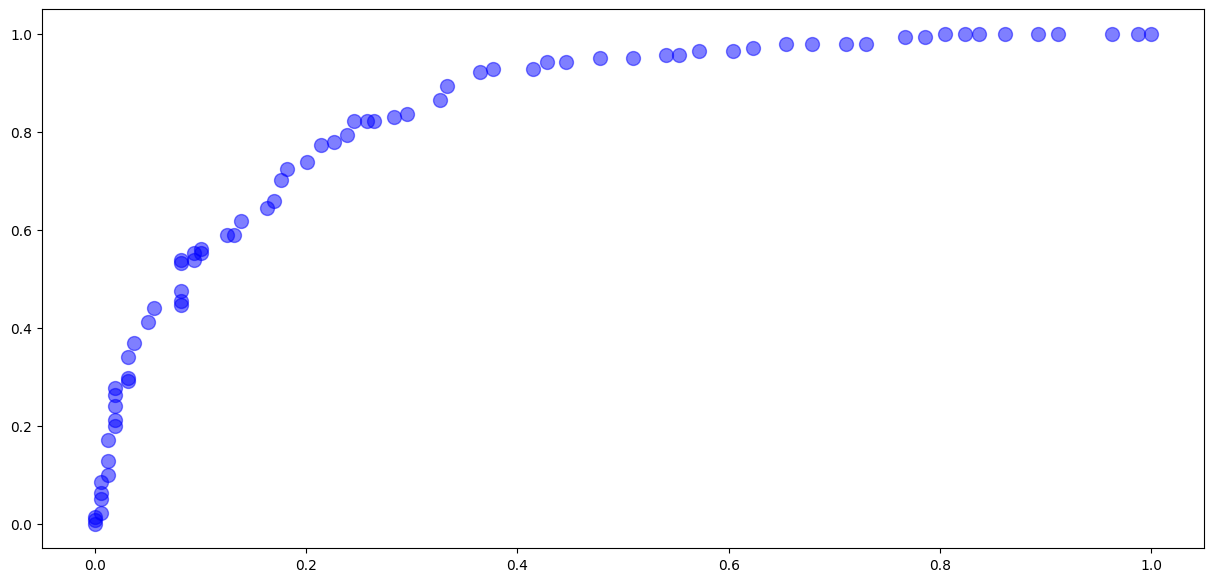

In [23]:

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, prob_vector)
ROC = roc_from_scratch(y_test, prob_vector)
plt.figure(figsize=(15, 7))
plt.scatter(fpr, tpr, s=100, alpha=0.5, color="blue", label="Scikit-learn")
plt.scatter(
    ROC[:, 0], ROC[:, 1], color="red", s=100, alpha=0.3, label="Our implementation"
)
plt.title("ROC Curve", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=16)
plt.ylabel("True Positive Rate", fontsize=16)
plt.legend()